PROJECT BY MALAVIKA RAJANALA, SRI CHETHAN VALLABHANENI, VIKAS NIMMAGADDA

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install scikit-learn

In [5]:
!pip install seaborn

In [6]:
!pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
# Set up GPU (if available)
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [11]:
# Load
data = pd.read_csv('/content/diabetes.csv')

In [12]:
# Prepare the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4994 - loss: 0.7061 - val_accuracy: 0.6423 - val_loss: 0.6575
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6547 - loss: 0.6475 - val_accuracy: 0.6341 - val_loss: 0.6301
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6699 - loss: 0.5999 - val_accuracy: 0.6911 - val_loss: 0.5921
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6880 - loss: 0.5563 - val_accuracy: 0.6911 - val_loss: 0.5532
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7390 - loss: 0.5176 - val_accuracy: 0.7073 - val_loss: 0.5247
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7578 - loss: 0.4943 - val_accuracy: 0.7073 - val_loss: 0.5032
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7451 - loss: 0.4820 - val_accuracy: 0.7154 - val_loss: 0.4903
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7799 - loss: 0.4422 - val_accuracy: 0.7236

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.6665 
Test accuracy: 0.7403


In [18]:
# Get predictions
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [19]:
# Generate classification report
report = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



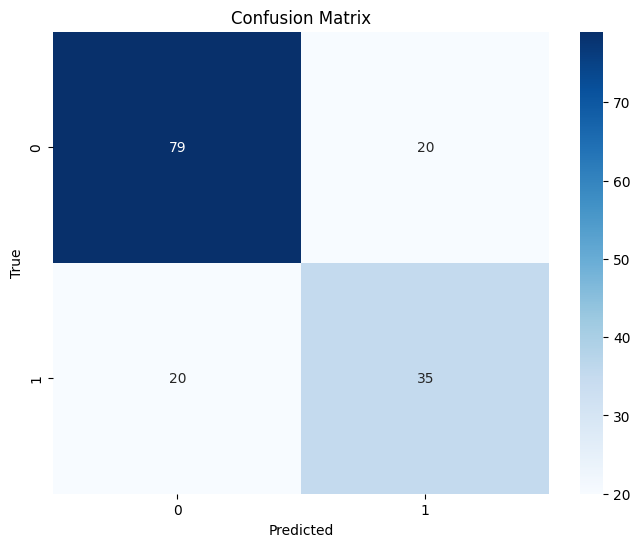

In [20]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

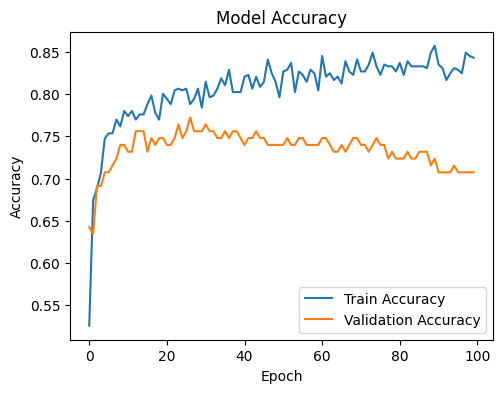

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

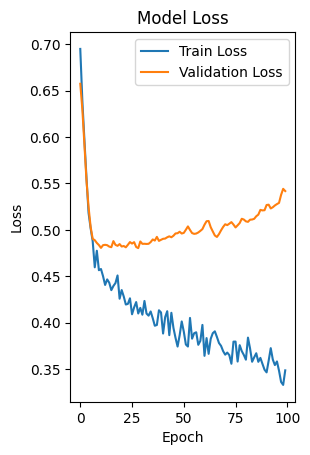

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
# Feature importance analysis
feature_importance = model.layers[0].get_weights()[0]
feature_importance = np.abs(feature_importance).mean(axis=1)
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

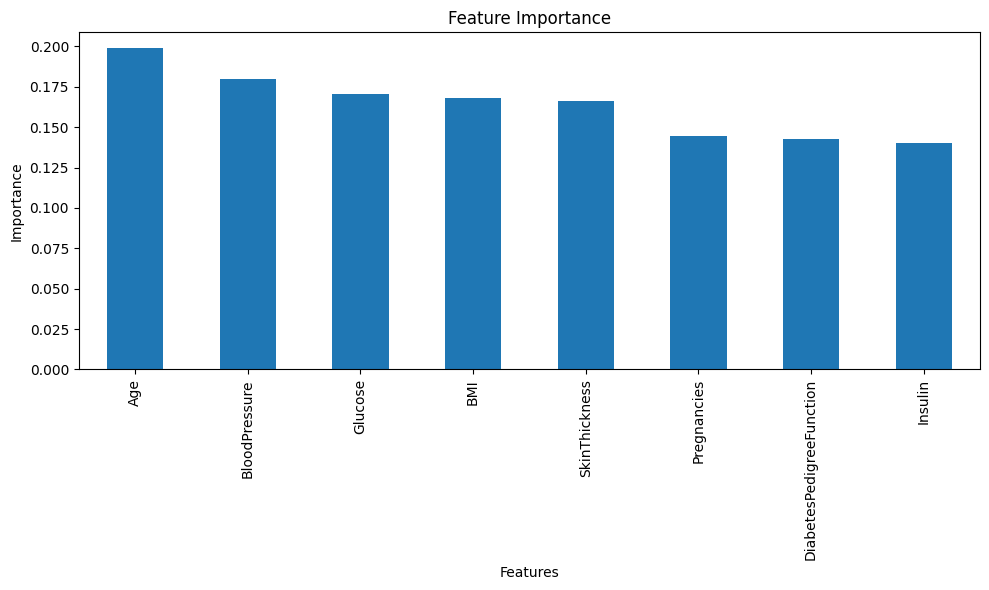

In [25]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [26]:
# Modify the predict_diabetes function
def predict_diabetes(data):
    # Ensure data is a DataFrame with correct column names
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

    # Scale the data
    scaled_data = scaler.transform(data)

    # Make prediction
    prediction = model.predict(scaled_data)
    return prediction[0][0]

In [27]:
sample_data = {
    "Pregnancies": 6,
    "Glucose": 148,
    "BloodPressure": 72,
    "SkinThickness": 35,
    "Insulin": 0,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.627,
    "Age": 50
}

In [28]:
# Convert the dictionary to a pandas DataFrame
new_data = pd.DataFrame([sample_data])

In [29]:
# Make prediction
risk = predict_diabetes(new_data)
print(f"Diabetes risk: {risk:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Diabetes risk: 0.85
